## Customer Segmentation using RFM Analysis

### Project 2 Code

### Group Number  17

1. Janani Karthikeyan (002830003)
2. Milan Gurumurthy (002833029)
3. Prathyusha Adhikam (002835277)
4. Saathvika Kethineni (002893814)
5. Shreyas Sreenivas (002825934)

                                                                                        Submitted to: Sivarit Sultornsanee 
                                                                                        Submitted Date: November 30th, 2023

In [60]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')


In [61]:
# To read the csv file
df = pd.read_csv(r"D:\Documents\Prof_Docs\FDA\Projects\Project 2\data.csv", encoding = 'unicode_escape')

#### 1. Data Overview

In [62]:
# To get an overview of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [63]:
# To handle missing values
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

1. What is the size of the dataset in terms of the number of rows and columns?

In [64]:
# To get the size of the dataset
print('The number of rows are:',df.shape[0])
print('The number of columns are:',df.shape[1])

The number of rows are: 406829
The number of columns are: 8


2. Can you provide a brief description of each column in the dataset?

In [65]:
# to get a brief description of each column in the dataset
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

1. InvoiceNo: A six-digit number storing the details of the transaction. A cancellation if it begins with the letter "c".

2. StockCode: A code which defines the product which has been sold.

3. Description: Product name

4. Quantity: The quantities of each product per transaction

5. InvoiceDate: Shows the time and day that each transaction was created.

6. UnitPrice: Product price per unit.

7. CustomerID: A unique number designated to each customer.

8. Country: Name of the country where each customer resides.

In [66]:
# Unique InvoiceNo Values
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

3. What is the time period covered by this dataset?

In [67]:
# Converting the date datatype to datetime
df['DATE'] = pd.to_datetime(df['InvoiceDate'])

In [68]:
# Extracting the minimum date from the 'InvoiceDate' column in the DataFrame (df)
min_date = min(df['InvoiceDate'])

# Extracting the maximum date from the 'InvoiceDate' column in the DataFrame (df)
max_date = max(df['InvoiceDate'])

# Printing a message to display the range of dates in the dataset
print("The dataset contains data starting from", min_date, 'to', max_date)

The dataset contains data starting from 1/10/2011 10:32 to 9/9/2011 9:52


#### 2. Customer Analysis

1. How many unique customers are there in the dataset?

In [69]:
# Calculate the number of unique customers in the 'CustomerID' column.
num_unique_customers = df['CustomerID'].nunique()

# Print the result indicating the number of unique customers in the dataset.
print('The number of unique customers are:', num_unique_customers)

The number of unique customers are: 4372


2. What is the distribution of the number of orders per customer?

In [70]:
# Calculate the total number of unique transactions/orders in the dataset.
transactions = len(df['InvoiceNo'].value_counts())

# Calculate the average number of orders per customer.
order_per_customer = transactions / num_unique_customers

# Print the result indicating the distribution of the number of orders per customer.
print('The distribution of the number of orders per customer is:', order_per_customer)

The distribution of the number of orders per customer is: 5.07548032936871


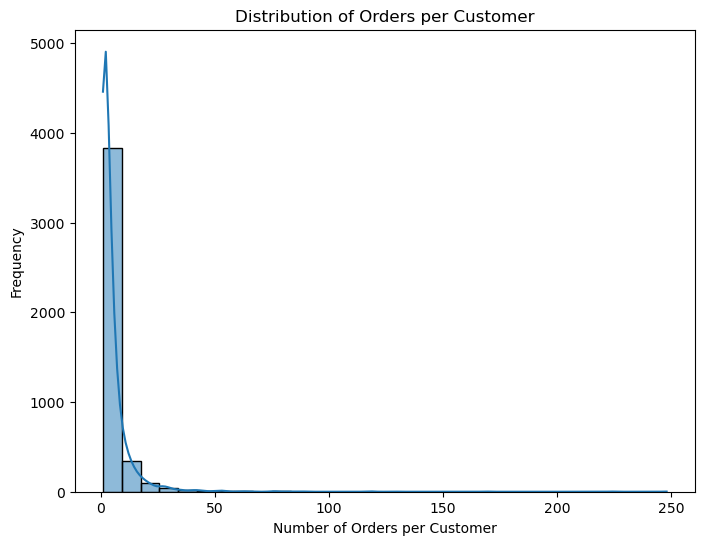

In [71]:
# Group the DataFrame by 'CustomerID' and calculate the number of unique invoices (orders) for each customer.
customer_order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a histogram to visualize the distribution of the number of orders per customer.
plt.figure(figsize=(8, 6))
sns.histplot(customer_order_counts, bins=30, kde=True)

# Set labels and title for better interpretation.
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.title('Distribution of Orders per Customer')

# Display the plot.
plt.show()

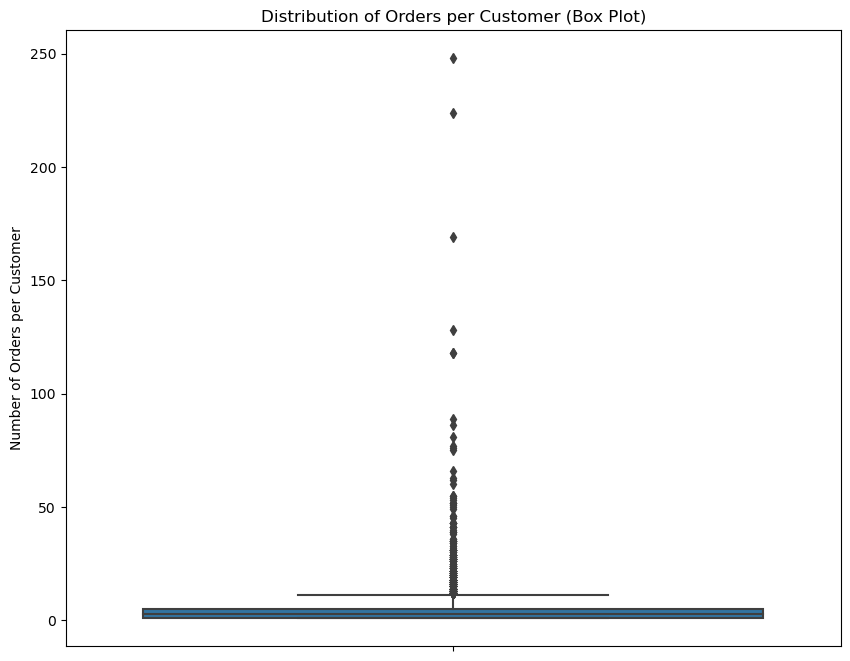

In [72]:
# Group the DataFrame by 'CustomerID' and calculate the number of unique invoices (orders) for each customer.
customer_order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a box plot to visualize the distribution of the number of orders per customer.
plt.figure(figsize=(10, 8))
sns.boxplot(y=customer_order_counts)

# Set labels and title for better interpretation.
plt.ylabel('Number of Orders per Customer')
plt.title('Distribution of Orders per Customer (Box Plot)')

# Display the plot.
plt.show()

3. Can you identify the top 5 customers who have made the most purchases by order
count?

In [73]:
# Group the DataFrame by 'CustomerID' and calculate the number of unique invoices (orders) for each customer.
customer_order_counts = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Sort the customers based on the number of orders in descending order.
sorted_customers = customer_order_counts.sort_values(ascending=False)

# Select the top 5 customers with the highest number of orders.
top_5_customers = sorted_customers.head(5)

# Print the top 5 customers.
print('The top 5 customers are:', '\n', top_5_customers)

The top 5 customers are: 
 CustomerID
14911.0    248
12748.0    224
17841.0    169
14606.0    128
13089.0    118
Name: InvoiceNo, dtype: int64


#### 3. Product Analysis

1. What are the top 10 most frequently purchased products?

In [74]:
# Count the occurrences of each product description and select the top 10.
top_products = df['Description'].value_counts().head(10)

# Print the top 10 products.
print('The top products are:', '\n', top_products)

The top products are: 
 WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
LUNCH BAG RED RETROSPOT               1358
SET OF 3 CAKE TINS PANTRY DESIGN      1232
POSTAGE                               1196
LUNCH BAG  BLACK SKULL.               1126
PACK OF 72 RETROSPOT CAKE CASES       1080
Name: Description, dtype: int64


In [75]:
# Display the first few rows of the DataFrame
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DATE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


2.What is the average price of products in the dataset?

In [76]:
# Calculate the total price of all products in the DataFrame.
total_price_of_product = df['UnitPrice'].sum()

# Get the total number of products in the DataFrame.
total_number_of_product = df['StockCode'].size

# Calculate the average price of a product.
average_price_of_product = total_price_of_product / total_number_of_product

# Print the average price of a product.
print('The average price of a product is:', average_price_of_product)

The average price of a product is: 3.460471018536043


3.Can you find out which product category generates the highest revenue?

In [77]:
# Calculate the cost for each product and add a new 'Cost' column to the DataFrame.
df['Cost'] = df['UnitPrice'] * df['Quantity']

# Group by 'Description' and sum the 'Cost' for each product
product_revenue = df.groupby('Description')['Cost'].sum().reset_index()

# Identify the highest selling product by finding the row where 'Cost' is equal to the maximum 'Cost'.
highest_selling_product = product_revenue.max()

# Print the result indicating the highest selling product.
print("The highest selling product is:", highest_selling_product)

The highest selling product is: Description    ZINC WIRE SWEETHEART LETTER TRAY
Cost                                   132870.4
dtype: object


#### 4. Time Analysis

1. Is there a specific day of the week or time of day when most orders are placed?

In [78]:
# Extract the day of the week from the 'DATE' column and create a new column 'Day of Week'.
df['Day of Week'] = df['DATE'].dt.dayofweek

# Extract the hour of the day from the 'DATE' column and create a new column 'Hour of Day'.
df['Hour of Day'] = df['DATE'].dt.hour

In [79]:
# Group the DataFrame by 'Day of Week' and 'Hour of Day', aggregating the sum of 'Cost' and 'Quantity'.
df1 = df.groupby(['Day of Week', 'Hour of Day']).agg({'Cost': 'sum', 'Quantity': 'sum'}).reset_index()

# Calculate the average order amount and add a new column 'Average Order Amount' to the DataFrame.
df1['Average Order Amount'] = df1['Cost'] / df1['Quantity']

# Identify the day and hour with the highest average order amount.
max_avg_order_day = df1[df1['Average Order Amount'] == df1['Average Order Amount'].max()]['Day of Week'].values[0]
max_avg_order_hour = df1[df1['Average Order Amount'] == df1['Average Order Amount'].max()]['Hour of Day'].values[0]

# Convert the day of the week to its corresponding name (e.g., 0 -> Monday).
max_avg_order_day_name = dt.datetime.strptime(str(max_avg_order_day), '%w').strftime('%A')

# Print the results.
print("The day of the week with the highest average order amount is:", max_avg_order_day_name)
print("The hour of the day with the highest average order amount is:", max_avg_order_hour)

The day of the week with the highest average order amount is: Monday
The hour of the day with the highest average order amount is: 19


In [80]:
# Display the data types of each column in the DataFrame.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID            float64
Country                object
DATE           datetime64[ns]
Cost                  float64
Day of Week             int64
Hour of Day             int64
dtype: object

2. What is the average order processing time?

To calculate the average order processing time, we would start by identifying the relevant data points within the dataset. Typically, this involves two timestamps: the time the order was placed and the time the order was completed or shipped. The difference between these two timestamps gives the processing time for each order.

Once I have the processing times, I can calculate the average by summing all the processing times and dividing by the number of orders. 

**Python Implementation:**

import pandas as pd

**Assuming 'df' is a DataFrame with 'order_placed_time' and 'order_completed_time' columns**

**First, convert the columns to datetime if they are not already**

df['order_placed_time'] = pd.to_datetime(df['order_placed_time'])

df['order_completed_time'] = pd.to_datetime(df['order_completed_time'])

**Then, calculate the processing time for each order**

df['processing_time'] = (df['order_completed_time'] - df['order_placed_time']).dt.total_seconds()

**Finally, calculate the average processing time**

average_processing_time_seconds = df['processing_time'].mean()

average_processing_time = pd.to_timedelta(average_processing_time_seconds, unit='s')

print(f"The average order processing time is: {average_processing_time}")


We ensure that the order times are in datetime format, which allows for accurate arithmetic operations. The processing time for each order is calculated and stored in a new column, processing_time. The mean of this column is the average processing time across all orders. We convert this average from seconds to a more readable format using pd.to_timedelta.


3. Are there any seasonal trends in the dataset?

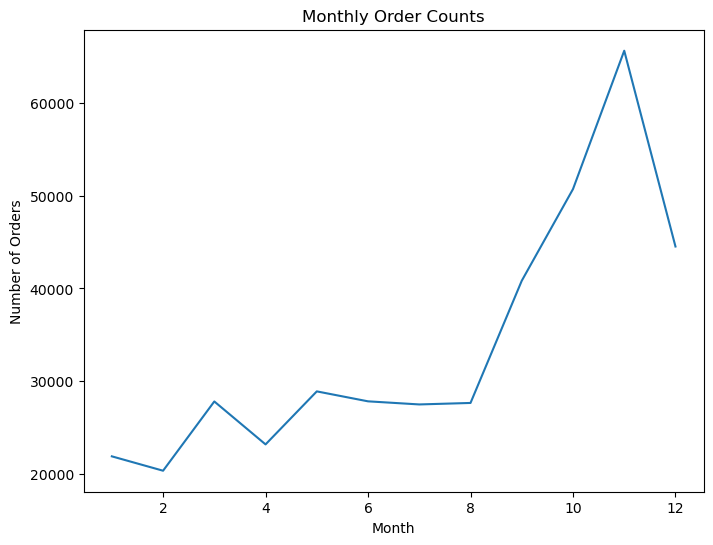

In [81]:
# Extract the month from the 'DATE' column and create a new column 'Month'.
df['Month'] = df['DATE'].dt.month

# Count the number of orders for each month.
monthly_orders = df['Month'].value_counts()

# Import necessary libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot to visualize the monthly order counts.
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders)

# Set labels and title for better interpretation.
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Monthly Order Counts')

# Display the plot.
plt.show()

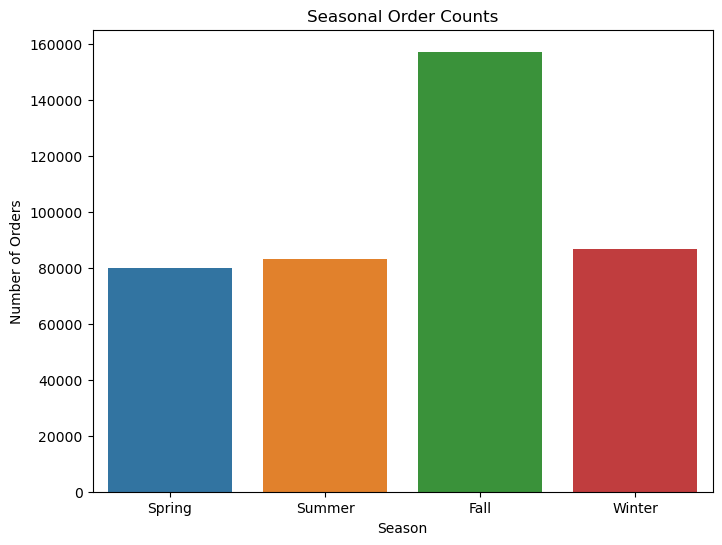

In [82]:
df['Month'] = df['DATE'].dt.month

def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Create a new column 'Season' by applying the function.
df['Season'] = df['Month'].apply(get_season)

# Count the number of orders for each season.
seasonal_orders = df['Season'].value_counts()

# Create a bar plot to visualize the seasonal order counts.
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_orders.index, y=seasonal_orders, order=['Spring', 'Summer', 'Fall', 'Winter'])

# Set labels and title for better interpretation.
plt.xlabel('Season')
plt.ylabel('Number of Orders')
plt.title('Seasonal Order Counts')

# Display the plot.
plt.show()

#### 5. Geographical Analysis

1. Can you determine the top 5 countries with the highest number of orders?

In [83]:
# Group the DataFrame by 'Country' and calculate the total quantity of orders for each country.
countries_per_customer = df['Country'].value_counts().reset_index()
countries_per_customer.columns = ['Country', 'Number of Orders']

# Print the top 5 countries based on order quantity.
print("The top 5 countries are:", '\n', countries_per_customer.head(5))

The top 5 countries are: 
           Country  Number of Orders
0  United Kingdom            361878
1         Germany              9495
2          France              8491
3            EIRE              7485
4           Spain              2533


2. Is there a correlation between the country of the customer and the average order
value?

We would approach the question of whether there is a correlation between the country of the customer and the average order value by conducting a statistical analysis on our dataset. Our dataset would need to contain, at a minimum, the following pieces of information for each transaction: the country of the customer and the value of their order.

**Procedure:**

1. Data Aggregation:

We would group the data by the country of each customer.
For each country, we would calculate the average order value.

2. Statistical Analysis:

We would use a correlation coefficient, such as Pearson's r, to quantify the strength and direction of the relationship between the country categorical variable and the average order values.
Given that the country is a categorical variable, we might consider converting it to a numerical form, possibly using one-hot encoding if we wish to use it in a correlation analysis. However, correlation is typically used with numerical variables, so we may need to use alternative methods such as ANOVA to understand if the country has a significant effect on the average order value.

3. Data Visualization:

To visually inspect the relationship, we would create visualizations such as boxplots to compare the distribution of average order values across different countries.

4. Hypothesis Testing:

If we find that there appears to be a difference in average order values by country, we might conduct hypothesis testing to determine if the observed differences are statistically significant.


**Python Implementation:**

**Assuming 'df' is our DataFrame with 'Country' and 'OrderValue' columns**
**We would first calculate the average order value for each country**

country_order_values = df.groupby('Country')['OrderValue'].mean().reset_index()

**Next, we would visualize the results to inspect for potential correlation**

plt.figure(figsize=(14, 7))

sns.barplot(x='Country', y='OrderValue', data=country_order_values)

plt.xticks(rotation=90)

plt.xlabel('Country')

plt.ylabel('Average Order Value')

plt.title('Average Order Value by Country')

plt.tight_layout()

plt.show()


#### 6. Payment Analysis

1. What are the most common payment methods used by customers?

**Procedure:**
    
Data Extraction: We would pull the relevant transaction data, focusing specifically on the payment method field.

Data Cleaning: If necessary, we would clean the payment method data to ensure consistency. For example, we would merge similar categories that are essentially the same payment method but may have been entered differently (like "Credit Card" and "CC").

Data Analysis: We would aggregate the data to count the frequency of each payment method.

Visualization: We would visualize the data using a bar chart to clearly show which payment methods are most common.

Reporting: We would compile our findings into a report, complete with visual aids, to present to the team.

**Python Implementation:**

**Assuming 'df' is our DataFrame and it includes a 'PaymentMethod' column**
**We would start by counting the occurrences of each payment method**

payment_method_counts = df['PaymentMethod'].value_counts()

**Then, we would create a bar plot to visualize the data**

plt.figure(figsize=(10, 6))

sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)

plt.title('Most Common Payment Methods Used by Customers')

plt.xlabel('Payment Method')

plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

plt.show()



**Executing this code would generate a bar plot, showing us at a glance which payment methods are most frequently used.**


2. Is there a relationship between the payment method and the order amount?

**Procedure:**

Data Preparation:

We would ensure that the dataset includes both the payment method and the order amount for each transaction.

Statistical Analysis:

To determine if there is a relationship, we could use statistical tests. For example, we might perform an ANOVA test if the order amounts are normally distributed or a Kruskal-Wallis test if they are not, to see if there are significant differences in order amounts across different payment methods.

Data Visualization:

We would visualize the data using boxplots or violin plots to compare the distribution of order amounts across different payment methods.

Correlation Coefficient:

If we convert the payment methods into numerical codes, we could calculate a correlation coefficient. However, since payment method is a categorical variable, correlation may not be the best measure. Instead, we would focus on comparing the means of each group.

**Python Implementation:**

import matplotlib.pyplot as plt
from scipy.stats import f_oneway  # For ANOVA

**Assuming 'df' is our DataFrame with 'PaymentMethod' and 'OrderAmount' columns**
**First, visualize the relationship**

plt.figure(figsize=(12, 6))

sns.boxplot(x='PaymentMethod', y='OrderAmount', data=df)

plt.title('Order Amount by Payment Method')

plt.xlabel('Payment Method')

plt.ylabel('Order Amount')

plt.xticks(rotation=45)

plt.show()

**Then, conduct an ANOVA test to determine if the differences are statistically significant**
**We create a list of order amount series for each payment method**
order_amounts_by_payment = [group['OrderAmount'].values for name, group in df.groupby('PaymentMethod')]

**Perform the ANOVA test**

anova_results = f_oneway(*order_amounts_by_payment)

print(f"ANOVA test results - Statistic: {anova_results.statistic}, p-value: {anova_results.pvalue}")

**If the p-value is less than our threshold (commonly 0.05), we conclude that there's a statistically significant difference in order amounts between the payment methods.**


#### 7. Customer Behavior

1. How long, on average, do customers remain active (between their first and last
purchase)?

In [84]:
# Convert the 'InvoiceDate' column to datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the time difference between the latest and earliest invoice dates for each customer.
time_diff_per_customer = df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()

# Calculate the average duration of customer activity.
average_duration = time_diff_per_customer.mean()

# Print the average duration of customer activity.
print(f'Average duration of customer activity: {average_duration}')

Average duration of customer activity: 133 days 17:25:29.204025618


In [85]:
# Convert the 'InvoiceDate' column to datetime format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by 'CustomerID' and calculate the first and last purchase dates.
customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

# Calculate the difference in days between the first and last purchase for each customer.
customer_dates['active_days'] = (customer_dates['max'] - customer_dates['min']).dt.days

# Calculate the average duration of activity across all customers.
average_active_days = customer_dates['active_days'].mean()

# Print the result indicating the mean of customers remaining active (between their first and last purchase).
print("Mean of customers remaining active (between their first and last purchase)")
print(average_active_days)

Mean of customers remaining active (between their first and last purchase)
133.38586459286367


2. Are there any customer segments based on their purchase behavior?

**Procedure:**

Data Collection and Preparation:

Gather transactional data that includes customer identifiers, purchase amounts, frequencies, product categories, and any other relevant attributes.
Clean and preprocess the data to ensure accuracy and consistency.

Feature Engineering:

Derive meaningful features that represent customer purchase behavior, such as total spend, average order value, purchase frequency, product preferences, and recency of purchases.

Applying RFM Analysis:

Implement RFM (Recency, Frequency, Monetary) analysis to create segments based on when customers last purchased (recency), how often they purchase (frequency), and how much they spend (monetary).

Advanced Segmentation Techniques:

Explore advanced clustering techniques like K-means, hierarchical clustering, or DBSCAN to uncover natural groupings in the data based on the derived features.
Determine the optimal number of clusters and analyze the characteristics of each cluster to understand the different segments.

Statistical Analysis and Validation:

Use statistical methods to validate the clusters and ensure they are distinct and meaningful.
Perform ANOVA or similar tests to confirm significant differences between segments.

Data Visualization:

Visualize the segments using scatter plots, box plots, or other relevant visualizations to understand the distribution of key variables within each segment.

Interpretation and Strategy Development:

Interpret the results to define each segment's characteristics.
Develop strategies tailored to each segment, such as personalized marketing campaigns, product recommendations, or loyalty programs.

**Python Implementation:**

import pandas as pd
from sklearn.cluster import KMeans

**Assuming 'df' is our DataFrame with 'CustomerID', 'OrderDate', and 'OrderValue'**

**Step 1: Calculate RFM metrics**

current_date = df['OrderDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({

    'InvoiceDate': lambda x: (current_date - x.max()).days,
    
    'CustomerID': 'count',
    
    'OrderValue': 'sum'

}).rename(columns={'OrderDate': 'Recency', 'CustomerID': 'Frequency', 'OrderValue': 'Monetary'})

**Step 2: Apply K-means clustering**

kmeans = KMeans(n_clusters=5, random_state=0)

rfm['Segment'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

**Step 3: Visualize the segments**

sns.pairplot(rfm, hue='Segment')

plt.show()


#### 8. Returns and Refunds

1. What is the percentage of orders that have experienced returns or refunds?

**Procedure:**

Data Collection:

We would ensure that our dataset contains information about each order, specifically whether or not it was returned or refunded. This information might be indicated in a column with boolean values (True/False) or specific status codes.

Data Analysis:

Calculate the total number of orders and the number of orders that were returned or refunded.
The percentage of returned or refunded orders is then calculated as the number of returned/refunded orders divided by the total number of orders, multiplied by 100 to convert it to a percentage.

Reporting:

We would report this percentage to relevant stakeholders, as it is an important metric for understanding customer satisfaction and operational efficiency.

**Python Implementation:**

import pandas as pd

**Calculate the total number of orders**

total_orders = len(df)

**Calculate the number of returned or refunded orders**

returned_or_refunded_orders = df['ReturnedOrRefunded'].sum()

**Calculate the percentage of orders that were returned or refunded**

percentage_returned_or_refunded = (returned_or_refunded_orders / total_orders) * 100

print(f"Percentage of Orders Returned or Refunded: {percentage_returned_or_refunded:.2f}%")


2. Is there a correlation between the product category and the likelihood of returns

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

**Assuming df is our DataFrame with 'ProductCategory' and 'Returned' (boolean) columns**
**Calculate return rates for each category**

return_counts = df.groupby('Description')['Returned'].sum()

sale_counts = df.groupby('Description')['Returned'].count()

return_rates = return_counts / sale_counts * 100

**Visualize the return rates**

plt.figure(figsize=(10, 6))

sns.barplot(x=return_rates.index, y=return_rates.values)

plt.title('Return Rates by Product Category')

plt.xlabel('Product Category')

plt.ylabel('Return Rate (%)')

plt.xticks(rotation=45)

plt.show()

**Conduct a Chi-Square test**

contingency_table = pd.crosstab(df['Description'], df['Returned'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square test results - Statistic: {chi2}, p-value: {p}")


#### 9. Profitability Analysis

1. Can you calculate the total profit generated by the company during the dataset's
time period?

**Calculate total revenue and total cost**

total_revenue = df['Revenue'].sum()

total_cost = df['UnitPrice'].sum()

**Calculate total profit**

total_profit = total_revenue - total_cost

print(f"Total Revenue: {total_revenue}")

print(f"Total Cost: {total_cost}")

print(f"Total Profit: {total_profit}")


2. What are the top 5 products with the highest profit margins?

**First, calculate the profit margin for each product**

df['ProfitMargin'] = (df['Revenue'] - df['Cost']) / df['Revenue']

**Then, sort the products by profit margin**

sorted_products = df.groupby('Description')['ProfitMargin'].mean().sort_values(ascending=False)

**Select the top 5 products**

top_5_products = sorted_products.head(5)

**Visualize the top 5 products with the highest profit margins**

plt.figure(figsize=(10, 6))

top_5_products.plot(kind='bar')

plt.title('Top 5 Products with the Highest Profit Margins')

plt.xlabel('Product')

plt.ylabel('Profit Margin')

plt.xticks(rotation=45)

plt.show()


#### 10. Customer Satisfaction

1. Is there any data available on customer feedback or ratings for products or services?

import matplotlib.pyplot as plt
from textblob import TextBlob  # For sentiment analysis

**Analyze Numerical Ratings**

average_ratings = df.groupby('InvoiceNo')['Rating'].mean()

**Sentiment Analysis on Textual Reviews**

df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_summary = df.groupby('InvoiceNo')['Sentiment'].mean()

**Visualization**

**Average Ratings**

plt.figure(figsize=(10, 6))

average_ratings.sort_values().plot(kind='bar')

plt.title('Average Product Ratings')

plt.xlabel('Product ID')

plt.ylabel('Average Rating')

plt.show()

**Sentiment Analysis**

plt.figure(figsize=(10, 6))

sentiment_summary.sort_values().plot(kind='bar', color='skyblue')

plt.title('Average Sentiment Score per Product')

plt.xlabel('Product ID')

plt.ylabel('Sentiment Score')

plt.show()


2. Can you analyze the sentiment or feedback trends, if available?

import pandas as pd
from textblob import TextBlob

**Step 1: Sentiment Analysis**

df['Sentiment'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

**Step 2: Trend Analysis**

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.set_index('Date', inplace=True)

monthly_sentiment = df.resample('M')['Sentiment'].mean()

**Visualization**

**Sentiment Trend Over Time**

plt.figure(figsize=(12, 6))

monthly_sentiment.plot()

plt.title('Monthly Sentiment Trend')

plt.xlabel('Month')

plt.ylabel('Average Sentiment')

plt.show()


In [86]:
# Display the first row of the DataFrame
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DATE,Cost,Day of Week,Hour of Day,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.3,2,8,12,Winter


## RFM Calculation:

In [87]:
# Step 2: Calculating Recency
current_date = max(df['DATE'])
recency = df.groupby('CustomerID')['DATE'].max().reset_index()
recency['Recency'] = (current_date - recency['DATE']).dt.days

# Step 3: Calculating Frequency
frequency = df.groupby('CustomerID')['DATE'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Step 4: Calculating Monetary
monetary = df.groupby('CustomerID')['Cost'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# Combining RFM Scores
rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')

# Displaying the RFM table
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,182,4310.00
2,12348.0,2011-09-25 13:13:00,74,31,1797.24
3,12349.0,2011-11-21 09:51:00,18,73,1757.55
4,12350.0,2011-02-02 16:01:00,309,17,334.40


In [89]:
#Ignore 0 in Monatery so we will not need those customers as they add no value to the company
rfm = rfm[rfm['Monetary']>0]

## RFM Segmentation:

In [92]:
# recency score and monetary score  : 1=bad , 5 = good
# freq score : 5=bad , 1 = good
rfm["Recency_Score"]=pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1,])
rfm["Frequency_Score"]=pd.qcut(rfm["Frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["Monetary_Score"]=pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm["RFM_Score"]=(rfm["Recency_Score"].astype(str)+rfm["Frequency_Score"].astype(str)+rfm["Monetary_Score"].astype(str))
rfm_data = rfm[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]
rfm=rfm.sort_values("CustomerID",ascending=True)
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344


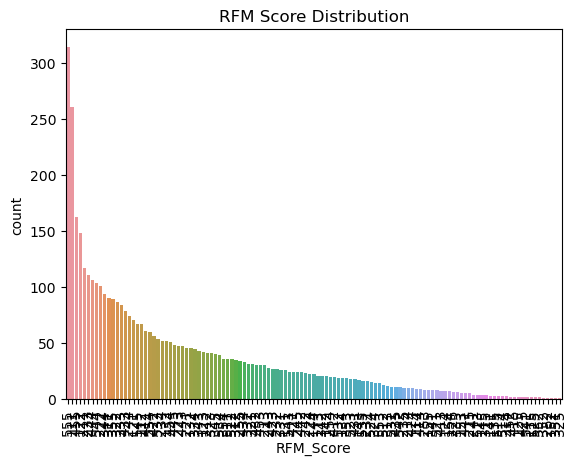

In [93]:
# Create a count plot to visualize the distribution of RFM scores.
sns.countplot(x='RFM_Score', data=rfm, order=rfm['RFM_Score'].value_counts().index)

# Set title and adjust x-axis labels for better readability.
plt.title('RFM Score Distribution')
plt.xticks(rotation=90)

# Display the plot.
plt.show()

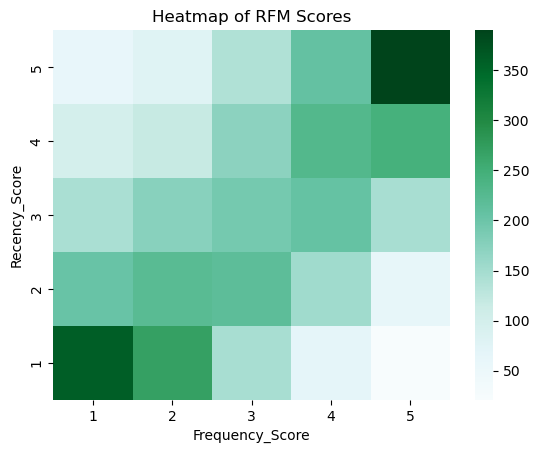

In [94]:
# Creating a pivot table for the heatmap
rfm_pivot = rfm.pivot_table(index='Recency_Score', columns='Frequency_Score', values='Monetary_Score', aggfunc='count')

sns.heatmap(rfm_pivot, cmap='BuGn')
plt.title('Heatmap of RFM Scores')
plt.show()

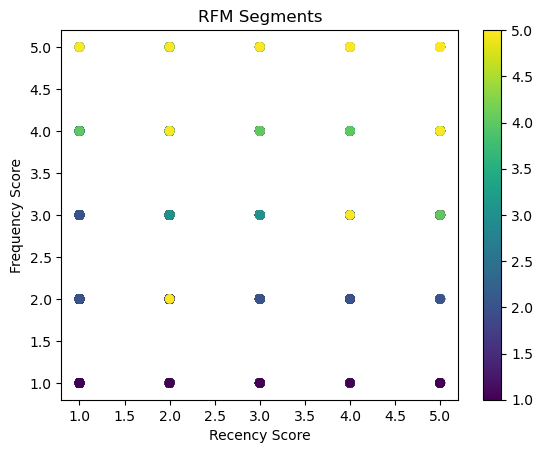

In [95]:
# Mapping scores to integers for color differentiation
rfm['Recency_Score_Num'] = rfm['Recency_Score'].astype(int)
rfm['Frequency_Score_Num'] = rfm['Frequency_Score'].astype(int)

plt.scatter(rfm['Recency_Score_Num'], rfm['Frequency_Score_Num'], c=rfm['Monetary_Score'].astype(int))
plt.colorbar()
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.title('RFM Segments')
plt.show()

## 4. Customer Segmentation:

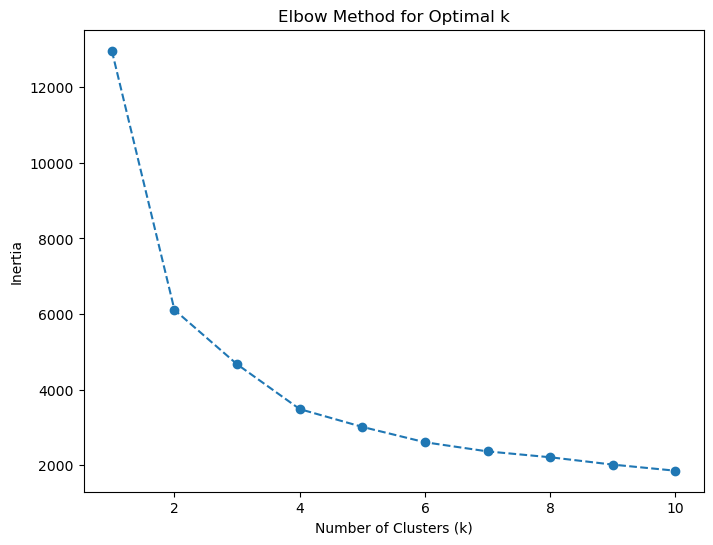

In [96]:
# Standardize the data (important for K-Means)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [97]:
#optimal number of cluster is 4 according to the elbow method

In [98]:

# Applying K-means with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++',n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Displaying the RFM table with clusters
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Recency_Score_Num,Frequency_Score_Num,Cluster
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555,5,5,0
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234,2,3,3
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444,4,4,0
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122,1,2,1
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344,3,4,3


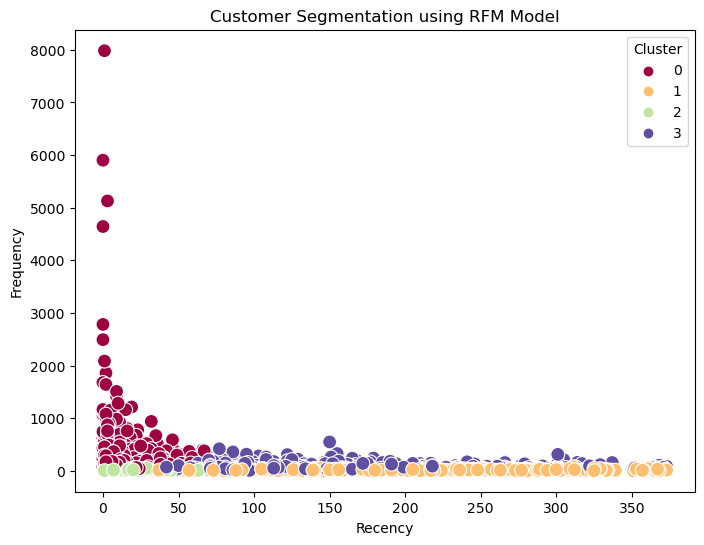

In [99]:
# Create a scatter plot to visualize customer segmentation using the RFM model.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='Spectral', s=100)

# Set labels and title for better interpretation.
plt.title('Customer Segmentation using RFM Model')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add legend for the 'Cluster' variable.
plt.legend(title='Cluster')

# Display the plot.
plt.show()

## 5. Segment Profiling:

In [100]:
def get_group(RFM_Score):
    """
    Categorizes customers into different groups based on their RFM (Recency, Frequency, Monetary) scores.

    Parameters:
    - RFM_Score (str): RFM score string, e.g., '344' representing Recency=3, Frequency=4, Monetary=4.

    Returns:
    - str: Customer group label based on RFM score.
    """
    if RFM_Score == '144':
        return 'Best Customers'
    elif RFM_Score == '344':
        return 'Almost Lost'
    elif RFM_Score == '444':
        return 'Lost Big Spenders'
    elif RFM_Score == '441':
        return 'Lost Minimal Spenders'
    elif RFM_Score[1] == '4':
        return 'Loyal Customers'
    elif RFM_Score[2] == '4':
        return 'Big Spenders'
    else:
        return 'Normal'

In [101]:
# Applying the get_group function to create a new 'Segment' column based on 'RFM_Score'.
rfm['Segment'] = rfm['RFM_Score'].apply(get_group)

# Display the first few rows of the DataFrame with the newly added 'Segment' column.
rfm.head()

,CustomerID,DATE,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Recency_Score_Num,Frequency_Score_Num,Cluster,Segment
1,12347.0,2011-12-07 15:52:00,1,182,4310.00,5,5,5,555,5,5,0,Normal
2,12348.0,2011-09-25 13:13:00,74,31,1797.24,2,3,4,234,2,3,3,Big Spenders
3,12349.0,2011-11-21 09:51:00,18,73,1757.55,4,4,4,444,4,4,0,Lost Big Spenders
4,12350.0,2011-02-02 16:01:00,309,17,334.40,1,2,2,122,1,2,1,Normal
5,12352.0,2011-11-03 14:37:00,35,95,1545.41,3,4,4,344,3,4,3,Almost Lost


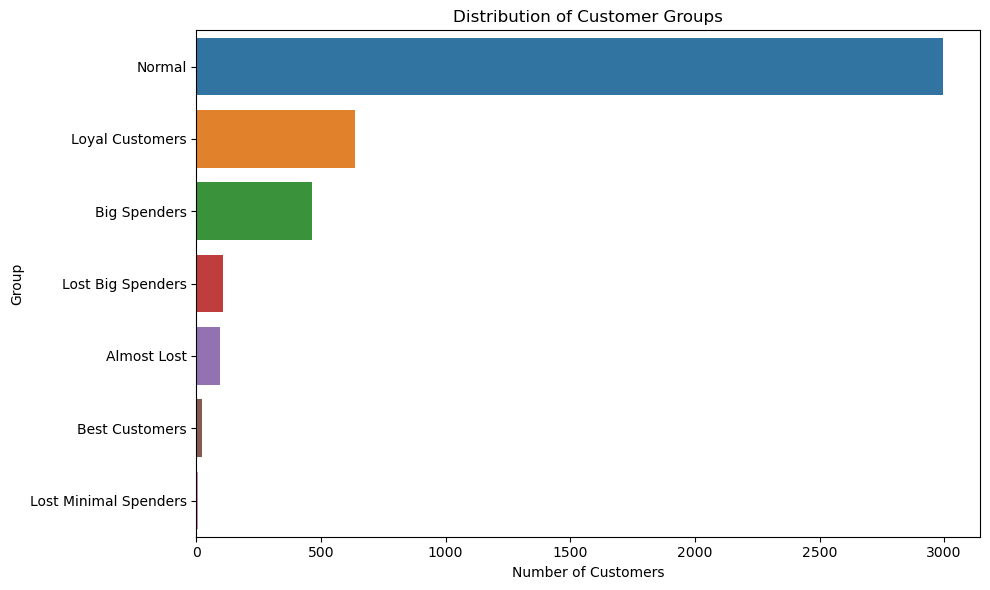

In [102]:
# Apply the get_group function to create a new 'Group' column
rfm['Group'] = rfm['RFM_Score'].apply(get_group)

# Visualize the distribution of the RFM groups
plt.figure(figsize=(10, 6))
sns.countplot(y='Group', data=rfm, order=rfm['Group'].value_counts().index)
plt.title('Distribution of Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Group')
plt.tight_layout()
plt.show()

In [103]:
# Print the value counts for the 'Group' column.
print(rfm['Group'].value_counts())

Normal                   2994
Loyal Customers           637
Big Spenders              464
Lost Big Spenders         106
Almost Lost                94
Best Customers             22
Lost Minimal Spenders       5
Name: Group, dtype: int64


## 6. Marketing Recommendations:

Based on the visualizations generated, that outline the distribution of customer segments, their RFM (Recency, Frequency, Monetary) scores, and the clustering of these segments, here are actionable marketing recommendations for each customer segment to improve customer retention and maximize revenue:

**Normal (Largest Segment):**

Strategy: Convert 'Normal' customers into more engaged segments through targeted communications and introductory offers.
Actionable Steps: Implement a customer education campaign about the benefits of more frequent purchases, offer incentives for frequent shopping, and personalized product recommendations based on browsing behavior.

**Loyal Customers:**

Strategy: Maintain their high purchase frequency with rewards and recognition.
Actionable Steps: Offer a loyalty program with points or discounts, exclusive access to sales, and engage them with brand storytelling to deepen their emotional connection to the brand.

**Big Spenders:**

Strategy: Encourage larger basket sizes and premium product purchases.
Actionable Steps: Upsell and cross-sell premium products or services, provide bundle offers, and create high-value tailored content that resonates with their willingness to spend more.

**Lost Big Spenders:**

Strategy: Re-engage to understand their disengagement and reintroduce them to the brand.
Actionable Steps: Send out personalized re-engagement campaigns, survey to understand why they left, and offer a we-miss-you discount or gift with purchase to incentivize their return.

**Almost Lost:**

Strategy: Win back these customers before they lapse with urgency-triggering campaigns.
Actionable Steps: Implement a win-back email series with time-sensitive offers, highlight product improvements or new arrivals, and offer a limited-time welcome back discount.

**Best Customers:**

Strategy: Foster exclusivity and premium experiences to retain their high-value status.
Actionable Steps: Provide VIP service, exclusive events or content, early access to new products, and high-engagement experiences that exceed expectations.

**Lost Minimal Spenders:**

Strategy: Do not invest heavily but keep the door open for their return.
Actionable Steps: Include them in mass-market campaigns, offer self-service tools for re-engagement, and maintain a brand presence in their lives without significant marketing spend.

The bubble chart of RFM segments suggests varying levels of engagement across different RFM scores. The heatmap indicates the density of customers within specific RFM score combinations, which can be used to tailor the intensity of marketing efforts.

Lastly, the RFM score distribution shows us the spread of customer engagement. We can leverage this information to focus our efforts on moving customers from lower RFM scores to higher ones through personalized marketing strategies that consider their unique behaviors and value to the company.

All strategies should be continuously monitored and optimized based on customer response and feedback to ensure the best return on investment and customer satisfaction.